### Drop UPC, FN / Create dummy variables for DD

In [8]:
train = pd.read_csv("data/train.csv")

In [9]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [10]:
# Weekday integer로..
def convert_weekday(day):
    if day == 'Sunday':
        return 0
    elif day == 'Monday':
        return 1
    elif day == 'Tuesday':
        return 2
    elif day == 'Wednesday':
        return 3
    elif day == 'Thursday':
        return 4
    elif day == 'Friday':
        return 5
    else:
        return 6
    
train.Weekday = train.Weekday.apply(convert_weekday)

In [11]:
# Returns column 추가
train['Returns'] = pd.Series([abs(num) if num < 0 else 0 for num in train.ScanCount], index=train.index)

In [12]:
# ScanCount rename Purchases
train.ScanCount = train.ScanCount.apply(lambda x: 0 if x < 0 else x)
train.rename(columns={'ScanCount': 'Purchases'}, inplace=True)

In [13]:
train.drop(['Upc', 'FinelineNumber'], inplace=True, axis=1)
train['DepartmentDescription'] = train['DepartmentDescription'].fillna('None')

In [14]:
train.head()

,TripType,VisitNumber,Weekday,Purchases,DepartmentDescription,Returns
0,999,5,5,0,FINANCIAL SERVICES,1
1,30,7,5,1,SHOES,0
2,30,7,5,1,PERSONAL CARE,0
3,26,8,5,2,PAINT AND ACCESSORIES,0
4,26,8,5,2,PAINT AND ACCESSORIES,0


In [15]:
dum_DD = pd.get_dummies(train.DepartmentDescription).astype(int, copy=False)

In [9]:
# 일단 보류
# dum_DD.drop(dum_DD.columns[0], inplace=True, axis=1)
# dum_FN.drop(dum_FN.columns[0], inplace=True, axis=1)

In [17]:
train.drop(['DepartmentDescription'], inplace=True, axis=1)

In [18]:
train.tail()

,TripType,VisitNumber,Weekday,Purchases,Returns
647049,39,191346,0,1,0
647050,39,191346,0,1,0
647051,39,191346,0,1,0
647052,8,191347,0,1,0
647053,8,191347,0,1,0


In [19]:
train.astype(int, copy=False)
train_2 = pd.concat([train, dum_DD], axis=1)

In [20]:
train_2.head()

,TripType,VisitNumber,Weekday,Purchases,Returns,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,5,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,8,5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,8,5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_2.to_csv("data/train_2.csv")

In [24]:
df = train_2.drop(columns='TripType')
corr = df.corr()

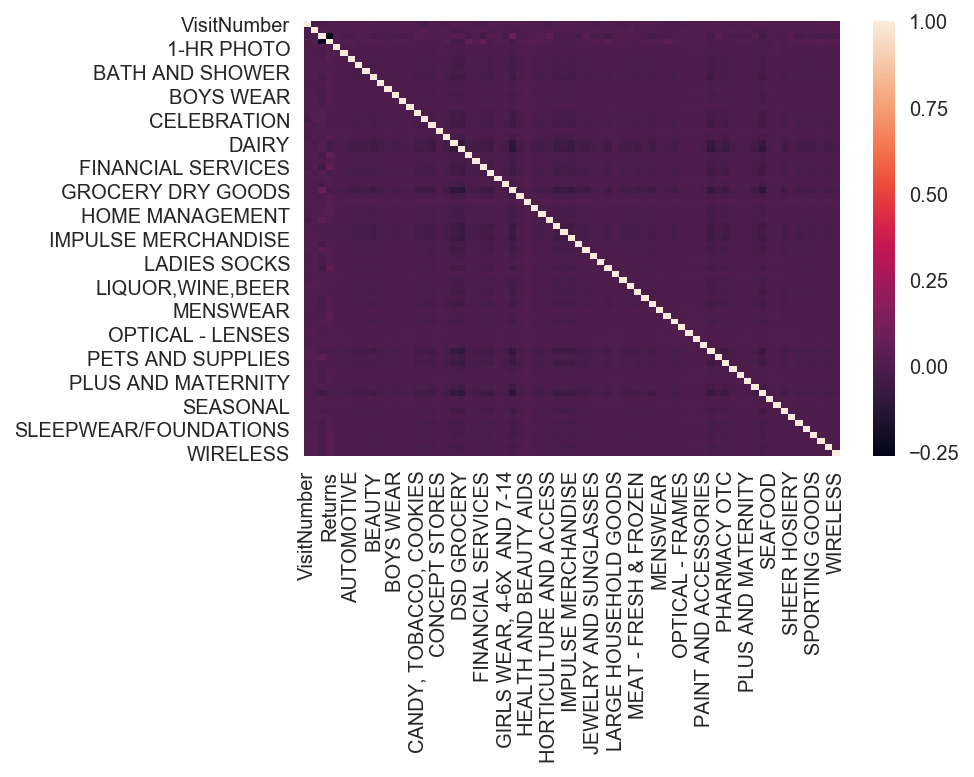

In [25]:
sns.heatmap(corr)

In [ ]:
sns.pairplot(train_2, hue="TripType")
plt.show()